In [ ]:
!pip install qiskit.aqua
!pip install qiskit==0.31.0
# AH: For some reason qiskit has dependency issues so these packages need to be installed

In [1]:
import numpy as np

from qiskit import BasicAer
from qiskit.aqua import QuantumInstance, aqua_globals
from qiskit.aqua.algorithms import VQC
from qiskit.aqua.components.optimizers import SPSA
from qiskit.circuit.library import TwoLocal, ZZFeatureMap
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name

seed = 10599
aqua_globals.random_seed = seed

/global/cfs/cdirs/m3443/usr/ahuang/het_gnn/envs/qc/lib/python3.8/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')
/tmp/ipykernel_103076/2284249259.py:11: DeprecationWarning: The variable qiskit.aqua.aqua_globals is deprecated. It was moved/refactored to qiskit.utils.algorithm_globals (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  aqua_globals.random_seed = seed


/global/cfs/cdirs/m3443/usr/ahuang/het_gnn/envs/qc/lib/python3.8/site-packages/qiskit/ml/__init__.py:40: DeprecationWarning: The package qiskit.ml is deprecated. It was moved/refactored to qiskit_machine_learning (pip install qiskit-machine-learning). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('ml', 'qiskit_machine_learning', 'qiskit-machine-learning')


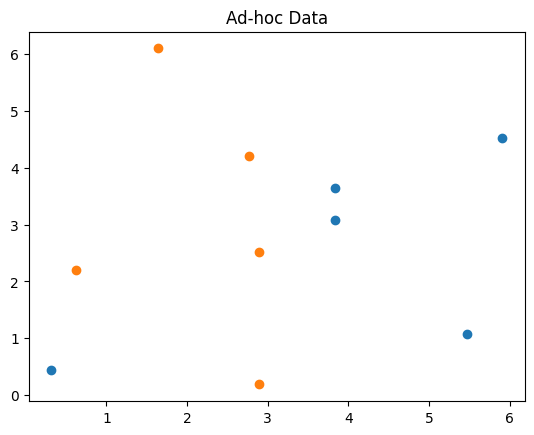

In [2]:
# AH: This is an example adapted from qiskit tutorial, we need to change this block to 
# lambeq & sentence inputs
from qiskit.ml.datasets import ad_hoc_data, sample_ad_hoc_data

feature_dim = 2 # AH: I believe this corresponds to num qubits
sample_total, training_input, test_input, class_labels = ad_hoc_data(
    training_size=5,
    test_size=1,
    n=feature_dim,
    gap=0.3,
    plot_data=True
)
extra_test_data = sample_ad_hoc_data(sample_total, 10, n=feature_dim)
datapoints, class_to_label = split_dataset_to_data_and_labels(extra_test_data)

In [4]:
training_input

{'A': array([[3.83274304, 3.64424748],
        [3.83274304, 3.0787608 ],
        [5.46637122, 1.0681415 ],
        [5.90619419, 4.52389342],
        [0.31415927, 0.43982297]]),
 'B': array([[2.76460154, 4.20973416],
        [1.63362818, 6.09468975],
        [2.89026524, 2.51327412],
        [2.89026524, 0.18849556],
        [0.62831853, 2.19911486]])}

In [6]:
feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=2)
optimizer = SPSA(maxiter=40, c0=4.0, skip_calibration=True)
var_form = TwoLocal(feature_dim, ['ry', 'rz'], 'cz', reps=3)
# TODO: append lambeq in front of vqc or replace feature_map
vqc = VQC(optimizer, feature_map, var_form, training_input, test_input, datapoints[0])

backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=128, seed_simulator=seed, seed_transpiler=seed)

display(vqc)
#result = vqc.run(quantum_instance) # AH: this is slow, be cautious when running